## 사용 데이터셋
- df1: 창원시 주민등록 인구통계
- df2: 창원시 가구특성 정보 (동별 인구통계 + 평균소득)
- df3: 창원시 도로주변 인구특성 (동단위가 아닌 도로 단위 인구통계)
- df4: 창원시 버스 정류장 위치 정보
- df5: 창원시 기초생활수급자 데이터
- df6: 창원시 주택가격 정보
- df7: 창원시 상권 정보

데이터 출처: https://www.notion.so/b62308aafba84f95b5f157248e0e3f37

In [2]:
import pandas as pd
url = 'C:/Users/koaro/OneDrive/바탕 화면/경남공모전/인구통계 데이터/'

### 1. 창원시 주민등록 인구통계

In [71]:
df1 = pd.read_csv("C:/Users/koaro/OneDrive/바탕 화면/경남공모전/인구통계 데이터/창원시 인구통계(2023년4월기준).csv", encoding='cp949')

# 괄호 문자 제거 함수 정의
def remove_parentheses(text):
    return text.split('(')[0]

# '행정구역' 열의 괄호 문자 제거
df1['행정구역'] = df1['행정구역'].apply(remove_parentheses)

# 컬럼명 수정
new_columns = [df1.columns[0]] + [col.split('_')[1] + col.split('_')[2] for col in df1.columns[1:]]
df1.columns = new_columns

a = df1['행정구역'].str.split()
df1['행정구역'] = a.apply(lambda x: x if len(x) >= 4 else None)
df1 = df1.dropna(subset=['행정구역'])

df1['행정구역'] = df1['행정구역'].apply(lambda x: ' '.join(x))

df1['자치구'] = df1['행정구역'].str.split().apply(lambda x: x[2])

cols = list(df1.columns)
cols.insert(1,cols.pop(-1))
df1 = df1[cols]

In [72]:
# 쉼표 제거
df1 = df1.replace(',', '', regex=True)

# 0번째와 1번째 컬럼 제외하고 수치형 변수로 변환
df1.iloc[:, 2:] = df1.iloc[:, 2:].apply(pd.to_numeric)

new_df1 = df1.iloc[:, [0] + list(range(10, 15))]

df1['노인총인구수'] = new_df1.iloc[:, 1:6].sum(axis=1)

selected_columns = ['행정구역', '자치구','계총인구수', '노인총인구수']
new_df = df1[selected_columns]
new_df['읍면동'] = new_df['행정구역'].str.split().apply(lambda x: x[3])

C:\Users\koaro\AppData\Local\Temp\ipykernel_11404\615504076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['읍면동'] = new_df['행정구역'].str.split().apply(lambda x: x[3])


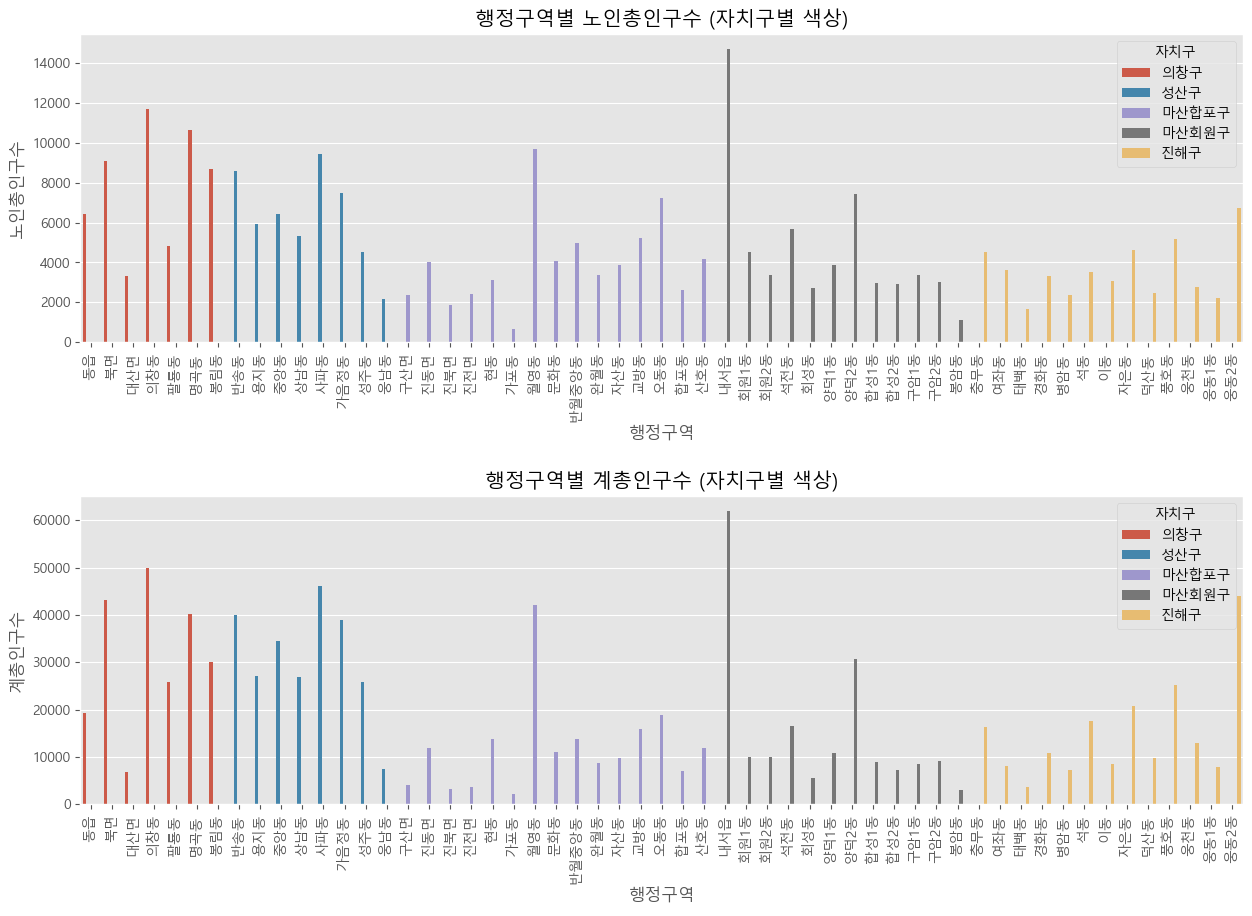

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
sns.barplot(data=new_df, x='읍면동', y='노인총인구수', hue='자치구')
plt.xlabel('행정구역')
plt.ylabel('노인총인구수')
plt.title('행정구역별 노인총인구수 (자치구별 색상)')
plt.xticks(rotation=90)
plt.legend(title='자치구')

plt.subplot(2,1,2)
sns.barplot(data=new_df, x='읍면동', y='계총인구수', hue='자치구')
plt.xlabel('행정구역')
plt.ylabel('계총인구수')
plt.title('행정구역별 계총인구수 (자치구별 색상)')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5)  # 그림 간의 수직 간격 조정

plt.show();

#### 노인총인구수, 계총인구수 추세를 보면 읍면동별로 유사한 모양세를 그림
#### 즉, 사람 많은 동네에 노인많고, 적은 동네에 적은 느낌 -> 지도나 다른 시각화 필요 + 노인인구비율 확인 필요

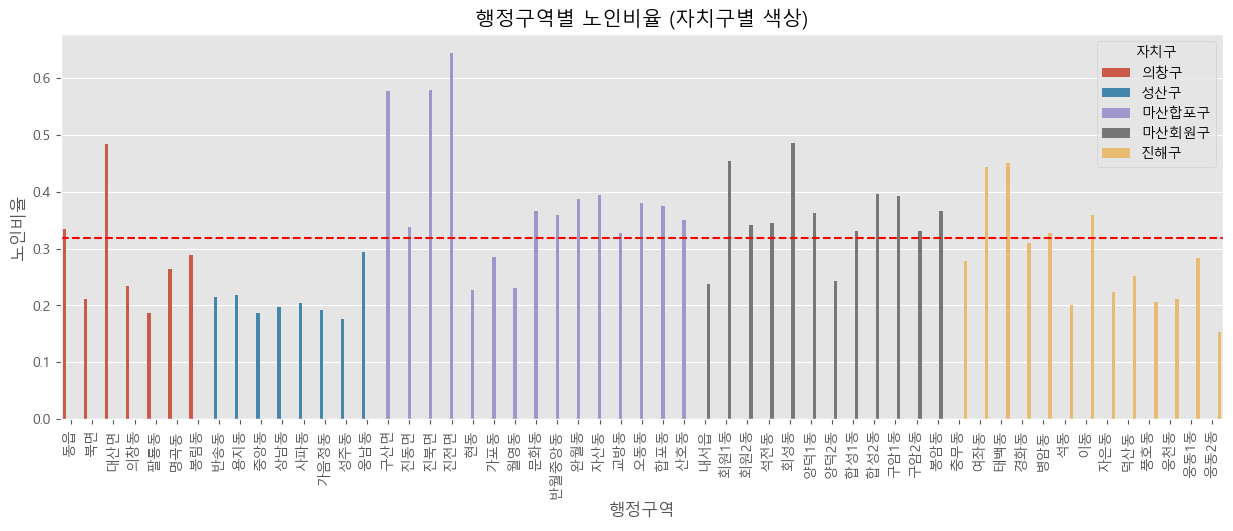

In [90]:
new_df['노인비율'] = new_df['노인총인구수']/new_df['계총인구수']

plt.figure(figsize=(15, 5))

sns.barplot(data=new_df, x='읍면동', y='노인비율', hue='자치구')
plt.xlabel('행정구역')
plt.ylabel('노인비율')
plt.title('행정구역별 노인비율 (자치구별 색상)')
plt.xticks(rotation=90)
plt.legend(title='자치구')
plt.axhline(new_df['노인비율'].mean(), color='red', linestyle='--', label='평균 노인비율')
plt.show();

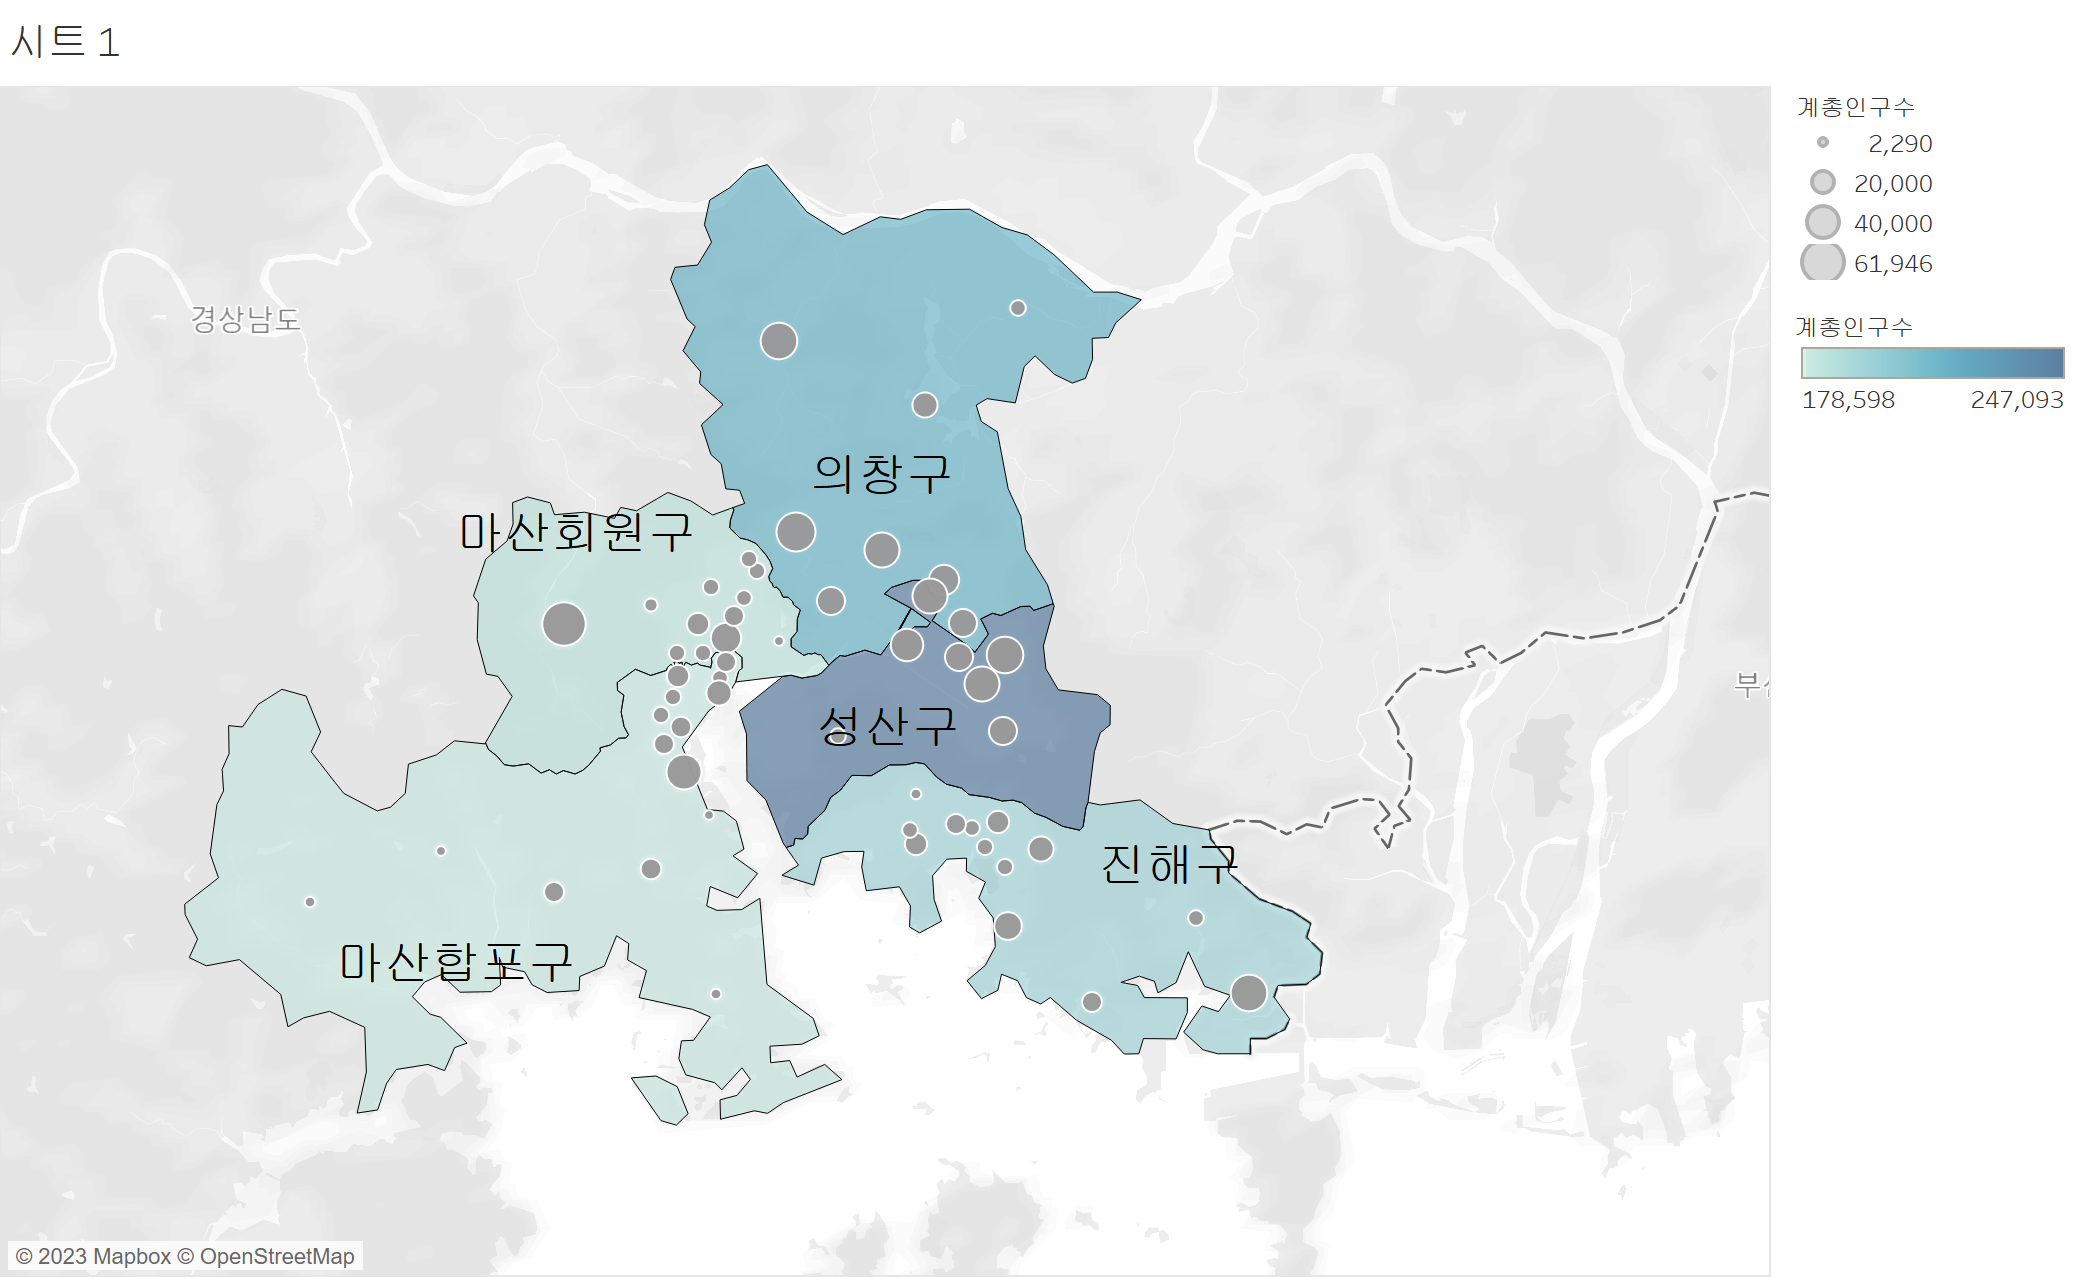

노인비율이 높은 지역의 위치를 보면, 대부분 인구 자체가 적은 시골(?)에 가까움
그렇다면 과연 이런 곳을 의료소외구역이라고 보는게 맞을까?

In [132]:
df1.to_csv('창원시 인구통계 전처리.csv', encoding='cp949')

### 2. 창원시 가구특성 정보

In [92]:
df2 = pd.read_csv(url+'가구_특성정보_(+소득정보)_211203.csv')

In [113]:
a = df2[df2['adstrd_nm'].str.split().str[0] == '경상남도']
a['adstrd_nm'].str.split().str[1].unique()

array(['창원시', '창원시마산합포구', '창원시마산회원구', '진주시', '통영시', '사천시', '김해시', '밀양시',
       '거제시', '양산시', '의령군', '함안군', '창녕군', '고성군', '남해군', '하동군', '산청군',
       '함양군', '거창군', '합천군'], dtype=object)

#### 마산회원구, 마산합포구 따로 있어서 따로 데이터프레임 만든 뒤, 창원시와 합쳐줘야함

In [93]:
masan= df2[df2['adstrd_nm'].str.split().str[1].isin(['창원시마산합포구', '창원시마산회원구'])]

masan['마산구'] = masan['adstrd_nm'].str.split().str[1]
masan['자치구'] = masan['마산구'].str.replace('창원시', '')
masan['읍면동'] = masan['adstrd_nm'].str.split().str[2]
masan = masan.drop(columns=['마산구'])

In [94]:
ch = ['창원시']
df2 = df2[df2['adstrd_nm'].str.split().str[1].isin(ch)]

In [95]:
df2['읍면동'] = df2['adstrd_nm'].str.split().str[3]
df2['자치구'] = df2['adstrd_nm'].str.split().str[2]

print('가구특성 데이터의 읍면동 개수:',len(df2['읍면동'].unique()))
print('인구통계 데이터의 읍면동 개수:', len(new_df['읍면동'].unique()))

가구특성 데이터의 읍면동 개수: 28
인구통계 데이터의 읍면동 개수: 55


두 데이터의 읍면동 개수가 차이나는 이유: 가구특성 데이터는 법정동 구분, 인구통계는 행정동...통일 안되어서 그런듯. 이건 나중에 쓸거면 통일하면됨. 그리고 가구특성 데이터는 리단위까지 구분되어 있음

컬럼 설명: 행정구역, 행정코드, 리, 법정동코드, 총인구수, 총가구수, 가구당 인구수, 평균소득(만원)

In [96]:
# 마산, 창원 데이터프레임 합치기 

merged_df = pd.concat([df2, masan], axis=0)

col = ['adstrd_nm','자치구','읍면동','legaldong_nm','ave_income_amt']
merged_df = merged_df[col]

merged_df = merged_df.reset_index(drop=True)

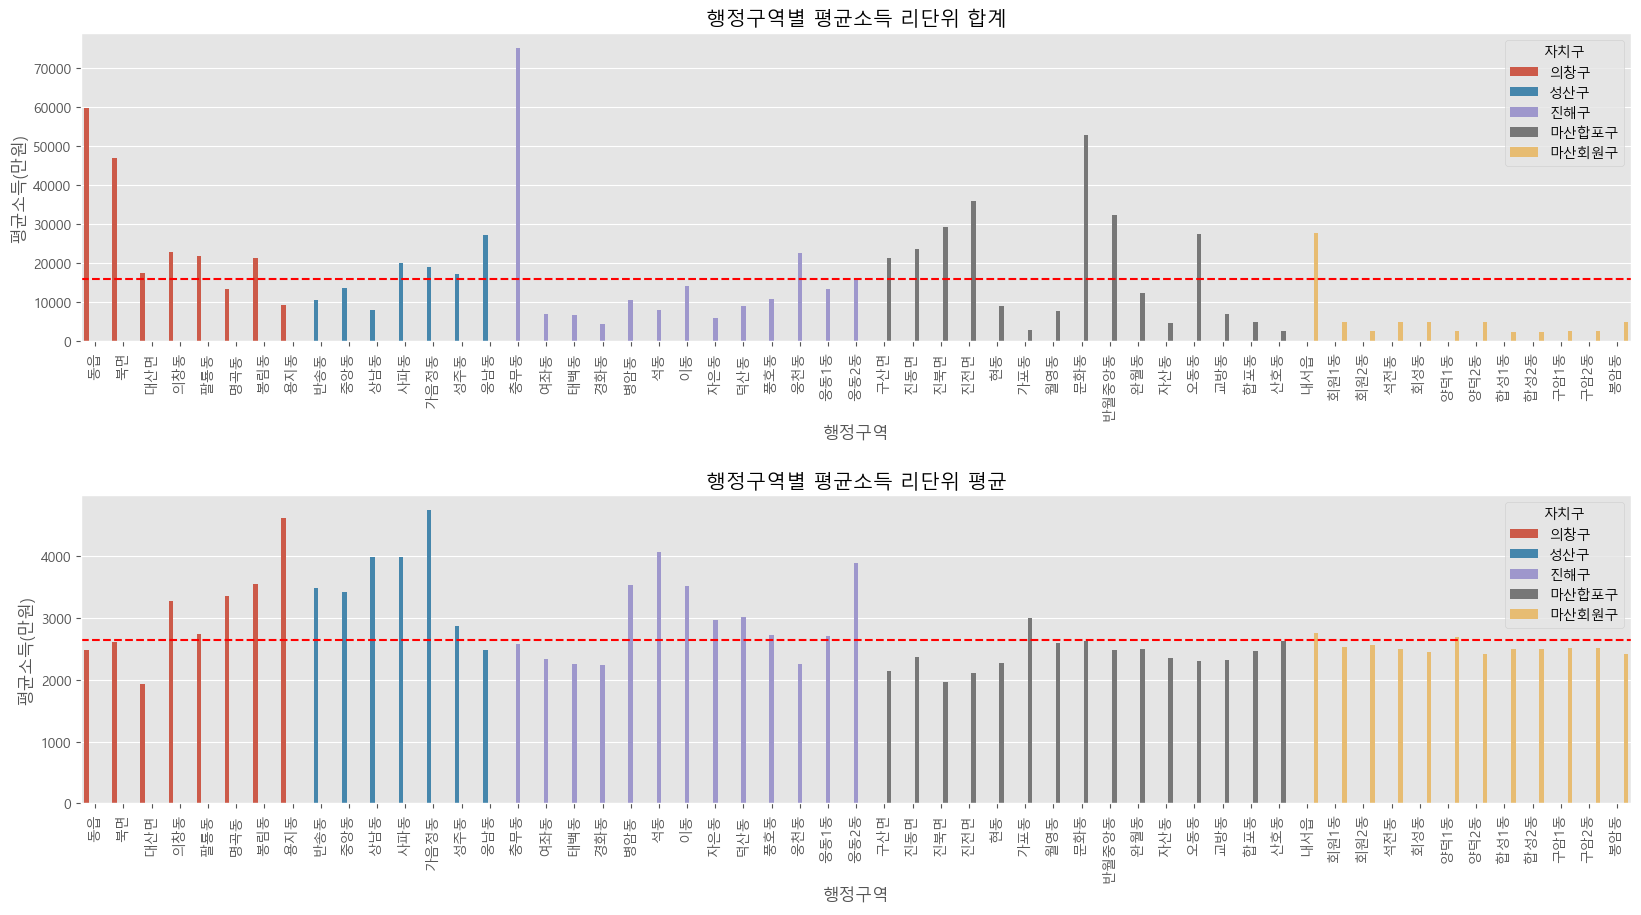

In [99]:
plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
sns.barplot(data=merged_df, x='읍면동', y='ave_income_amt', hue='자치구', ci=None, estimator=sum)
plt.xlabel('행정구역')
plt.ylabel('평균소득(만원)')
plt.title('행정구역별 평균소득 리단위 합계')
plt.xticks(rotation=90)
plt.legend(title='자치구')
plt.axhline(merged_df['ave_income_amt'].sum()/len(merged_df['읍면동'].unique()), color='red', linestyle='--', label='평균소득')

plt.subplot(2,1,2)
sns.barplot(data=merged_df, x='읍면동', y='ave_income_amt', hue='자치구', ci=None)
plt.xlabel('행정구역')
plt.ylabel('평균소득(만원)')
plt.title('행정구역별 평균소득 리단위 평균')
plt.xticks(rotation=90)
plt.legend(title='자치구')
plt.axhline(merged_df['ave_income_amt'].mean(), color='red', linestyle='--', label='평균소득')
plt.subplots_adjust(hspace=0.5)  # 그림 간의 수직 간격 조정

plt.show();

#### 성산구, 의창구가 유의미하게 높고, 나머지 지역은 낮은 것을 확인

#### 계산 방법: 데이터프레임 인덱스가 리 단위까지 있어서 평균소득 합계(sum)이 각 ㅇㅇ동의 평균소득 합계이고, mean은 ㅇㅇ동의 평균소득 합계/각 리의 개수임
#### 따라서 우리가 다른 데이터에는 리가 없으므로 리단위 평균이 아닌 합계 (위 그림)을 이용하는게 합리적으로 보임
#### 리단위 평균을 이용하면 리의 개수에 따라 영향을 받으므로

In [178]:
dong = merged_df[merged_df['읍면동'] == '동읍']
print(dong['ave_income_amt'].mean())
print(dong['ave_income_amt'].sum()/len(dong))
print(dong['ave_income_amt'].sum())

2487.0204166666663
2487.0204166666667
59688.490000000005


### 3. 창원시 도로주변 인구특성

In [191]:
df3 = pd.read_csv(url+"도로주변_인구분포_통계(2020).csv")
df3 = df3.iloc[:,3:]

In [195]:
df3[df3['SM_ZONE_CODE'].str.split().str[0] == '경상남도']

,SM_ZONE_CODE,SEXDSTN,BELOW_FOUR_AGE_CO,FIVE_TO_NINE_AGE_CO,TEN_TO_FOURTEEN_AGE_CO,FIFTEEN_TO_NINETEEN_AGE_CO,TWENTY_TO_TWENTYFOUR_AGE_CO,TWENTYFIVE_TO_TWENTYNINE_AGE_CO,THIRTY_TO_THIRTYFOUR_AGE_CO,THIRTYFIVE_TO_THIRTYNINE_AGE_CO,...,SIXTY_TO_SIXTYFOUR_AGE_CO,SIXTYFIVE_TO_SIXTYNINE_AGE_CO,SEVENTY_TO_SEVENTYFOUR_AGE_CO,SEVENTYFIVE_TO_SEVENTYNINE_AGE_CO,EIGHTY_TO_EIGHTYFOUR_AGE_CO,EIGHTYFIVE_TO_EIGHTYNINE_AGE_CO,NINETY_TO_NINETYFOUR_AGE_CO,NINETYFIVE_TO_NINETYNINE_AGE_CO,ABOVE_ONE_HUNDRED_AGE_CO,TOT_POPLTN_CO
6,경상남도 사천시 축동면,남자,0,14,0,0,12,50,28,32,...,86,50,48,28,16,12,0,0,0,628
7,경상남도 사천시 축동면,여자,0,0,0,12,22,0,10,16,...,100,88,64,50,48,42,12,0,0,640
8,경상남도 진주시 정촌면,남자,10,30,44,58,40,56,54,32,...,156,158,94,44,48,0,0,0,0,1192
9,경상남도 진주시 정촌면,여자,0,14,40,10,14,34,14,36,...,166,108,108,104,104,70,14,0,0,1180
10,경상남도 진주시 정촌면,남자,10,30,44,58,40,56,54,32,...,156,158,94,44,48,0,0,0,0,1192
11,경상남도 진주시 정촌면,여자,0,14,40,10,14,34,14,36,...,166,108,108,104,104,70,14,0,0,1180
16,경상남도 함양군 함양읍,남자,62,140,288,326,234,296,204,286,...,636,514,368,328,264,50,0,0,0,6336
17,경상남도 함양군 함양읍,여자,98,130,242,306,162,196,166,206,...,726,542,504,580,500,330,122,0,0,6818
18,경상남도 거창군 남상면,남자,0,0,0,10,20,0,0,20,...,46,30,36,22,24,0,0,0,0,298
19,경상남도 거창군 남상면,여자,0,0,0,0,10,12,0,0,...,48,44,32,42,48,16,0,0,0,326


In [196]:
len(df3)

60

#### 제공한 데이터에 창원시 존재 X -> 사용불가 ㅜㅜ 

### 4. 버스정류장 위치 정보

In [201]:
df4 = pd.read_csv(url+"경상남도 창원시_버스정류장위치정보_20191201.csv", encoding='cp949')

In [203]:
df4

,ID,모바일_ID,행정구역,정류장명,주소,위도,경도
0,1,100201,동읍,합산,NaN,128.677387,35.337581
1,2,100202,동읍,합산,NaN,128.677291,35.337657
2,3,100203,동읍,용산입구,NaN,128.678880,35.332786
3,4,100204,동읍,용산입구,NaN,128.678769,35.332731
4,5,100205,대산면,백양마을,NaN,128.687349,35.327622
...,...,...,...,...,...,...,...
2393,2394,630360,남문동,동영로지스틱스(주),NaN,128.774230,35.088324
2394,2395,630361,용원동,말무교,NaN,128.823837,35.091914
2395,2396,630362,용원동,말무교,NaN,128.823983,35.091702
2396,2397,630372,죽곡동,진해구 어은입구,NaN,128.726505,35.113459


In [202]:
df4['행정구역'].unique()

array(['동읍', '대산면', '북면', '소계동', '봉림동', '대원동', '도계동', '명서동', '구산면', '진동면',
       '삼동동', '팔용동', '차용동', '반지동', '반림동', '용호동', '봉곡동', '사림동', '신월동',
       '용동', '서상동', '중동', '소답동', '동정동', '덕정동', '사파동', '퇴촌동', '완월동', '가음동',
       '남양동', '신촌동', '웅남동', '성산동', '성주동', '상복동', '천선동', '귀산동', '상남동',
       '대방동', '불모산동', '귀곡동', '내동', '남산동', '안민동', '외동', '중앙동', '귀현동',
       '양곡동', '가음정동', '삼정자동', '사파정동', '해운동', '월남동5가', '월남동4가', '월남동3가',
       '월남동1가', '월남동2가', '중앙동1가', '중앙동2가', '중앙동3가', '서성동', '부림동', '중성동',
       '덕동동', '가포동', '월영동', '평화동', '문화동', '내서읍', '진전면', '자산동', '교방동',
       '현동', '우산동', '예곡동', '추산동', '오동동', '동성동', '진북면', '산호동', '성호동',
       '신포동1가', '신포동2가', '수성동', '남성동', '월포동', '충무동', '회원동', '석전동', '합성동',
       '구암동', '양덕동', '봉암동', '두척동', '회성동', '가주동', '남문동', '두동', '자은동', '석동',
       '여좌동', '태백동', '대장동', '덕산동', '마천동', '죽곡동', '원포동', '명동', '제덕동',
       '대죽동', '태평동', '안골동', '용원동', '청안동', '성내동', '서중동', '북부동', '경화동',
       '광화동', '대흥동', '풍호동', '장천동', '이동', '송죽동', '중평동', '수송동', '창선동',


#### 행정구역으로만 나타나 있어서 위경도 추출해서 상세 주소를 따서 추후에 활용하면 될듯?

#### 활용방안 예시: 특정구역별 버스정류장 개수, 특정공간(노인센터)과 버스정류장간의 거리 혹은 밀접성?

In [208]:
import folium

latitude = 35.113399

longitude = 128.726589

folium.Marker([latitude, longitude],
              popup="진해구",
              tooltip="진해구어은 입구", 
              icon=folium.Icon('red', icon='star'),
             ).add_to(m)
m

### 5. 창원시 기초생활수급자 데이터

기존 엑셀 파일에 있는 지저분한 시트를 아래와 같이 전처리하여 읍면동별 기초수급자 가구수, 수급권자수를 특성별로 구분한 df 생성
- 다만 위에 같이 사용할 다른 데이터간의 읍면동 통일은 필요

In [100]:
df5 = pd.read_excel(url+"2022_12기초생활수급자(전처리).xlsx",sheet_name=1)

- 여기서 정해야될게 의료소외자 기준을 어떻게 할 것인지? 노인, 기초수급자? 
- 기초수급자랑 노인이 중복되는 문제 발생 -> 노인이면 기초수급자? 기초수급자면 노인? 두 변수간의 독립성 보장 문제 발생


### 6. 창원시 주택가격 정보

In [3]:
df6 = pd.read_csv(url+"경상남도_창원시_개별주택가격정보_20190708.csv",encoding='cp949')

df6['지번'] = df6['법정동명']+' ' + df6['지번']
df6['자치구'] = df6['법정동명'].str.split().str[2]

col = ['지번','주택가격','토지대장면적','건물전체연면적','건물산정연면적','표준지여부','데이터기준일자']
df6 = df6[col]

C:\Users\koaro\AppData\Local\Temp\ipykernel_11404\3987923393.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv(url+"경상남도_창원시_개별주택가격정보_20190708.csv",encoding='cp949')


In [4]:
df6

,지번,주택가격,토지대장면적,건물전체연면적,건물산정연면적,표준지여부,데이터기준일자
0,경상남도 창원시 진해구 도천동 8-1,85700000,217.7,87.47,87.47,N,2019-07-08
1,경상남도 창원시 진해구 도천동 8-2,79800000,231.4,434.92,140.66,N,2019-07-08
2,경상남도 창원시 진해구 도천동 8-4,64100000,145.5,136.38,116.65,N,2019-07-08
3,경상남도 창원시 진해구 도천동 8-6,91400000,134.9,232.20,154.80,N,2019-07-08
4,경상남도 창원시 진해구 도천동 8-8,66800000,165.1,66.51,66.51,N,2019-07-08
...,...,...,...,...,...,...,...
79512,경상남도 창원시 의창구 대산면 대방리 501,209000000,1170.0,306.85,306.85,N,2019-07-08
79513,경상남도 창원시 의창구 대산면 대방리 522,147000000,662.0,73.60,73.60,N,2019-07-08
79514,경상남도 창원시 의창구 대산면 대방리 531-2,132000000,660.0,266.50,266.50,N,2019-07-08
79515,경상남도 창원시 의창구 대산면 대방리 549-1,145000000,460.0,199.20,199.20,N,2019-07-08


In [7]:
df6['지번'].str.split().str[1].unique()

array(['창원시'], dtype=object)

In [8]:
df6['지번'].str.split().str[2].unique()

array(['진해구', '마산합포구', '마산회원구', '성산구', '의창구'], dtype=object)

In [9]:
df6['데이터기준일자'].unique()

array(['2019-07-08'], dtype=object)

#### 기존 데이터는 마산 지역까지 다있는 것 확인. 다만 2019년 기준 데이터라서 지금 적용해도 될지모르겠음

#### 국가정보포털 (http://openapi.nsdi.go.kr/nsdi/eios/ServiceDetail.do)에서 얻은 데이터는 2020~2022년 데이터로 비교적 최근

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

da = "C:/Users/koaro/OneDrive/바탕 화면/경남공모전/공간위치/AL_48_D166_20230519.shp"
file = gpd.read_file(da, encoding='euc-kr')
file

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,geometry
0,4825010800101720004,4825010800,경상남도 김해시 내동,1,일반,172-4,2022,01,5,다세대,...,45350000.0,1.814000e+08,618522.0,4,46550000.0,45000000.0,48000000.0,56500000.0,2023-05-18,POINT (369214.768 195006.482)
1,4825010800101750010,4825010800,경상남도 김해시 내동,1,일반,175-10,2022,01,5,다세대,...,47000000.0,1.410000e+08,636081.0,3,48366667.0,46966667.0,50000000.0,57000000.0,2023-05-18,POINT (369126.336 195032.745)
2,4825010800101770005,4825010800,경상남도 김해시 내동,1,일반,177-5,2022,01,5,다세대,...,55350000.0,2.214000e+08,691659.0,4,56850000.0,55325000.0,58500000.0,67250000.0,2023-05-18,POINT (369055.037 194930.150)
3,4825010800101770009,4825010800,경상남도 김해시 내동,1,일반,177-9,2022,01,5,다세대,...,39266667.0,1.178000e+08,625498.0,3,40333333.0,39133333.0,41666667.0,47666667.0,2023-05-18,POINT (369094.876 194955.871)
4,4825010800101790004,4825010800,경상남도 김해시 내동,1,일반,179-4,2022,01,5,다세대,...,33900000.0,2.034000e+08,650547.0,6,35000000.0,33900000.0,36000000.0,41333333.0,2023-05-18,POINT (369010.335 195009.460)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,4812110500103440008,4812110500,경상남도 창원시 의창구 도계동,1,일반,344-8,2022,01,5,다세대,...,63000000.0,5.040000e+08,1053864.0,8,62800000.0,64100000.0,70000000.0,83000000.0,2023-05-18,POINT (348810.302 196711.978)
12751,4812110500103450001,4812110500,경상남도 창원시 의창구 도계동,1,일반,345-1,2022,01,5,다세대,...,94325000.0,7.546000e+08,1275352.0,8,94325000.0,96100000.0,103500000.0,118000000.0,2023-05-18,POINT (348774.398 196679.665)
12752,4812110500103450003,4812110500,경상남도 창원시 의창구 도계동,1,일반,345-3,2022,01,1,아파트,...,86144444.0,7.753000e+08,1069202.0,9,89322222.0,86611111.0,93777778.0,109444444.0,2023-05-18,POINT (348713.542 196635.984)
12753,4812110500103450004,4812110500,경상남도 창원시 의창구 도계동,1,일반,345-4,2022,01,1,아파트,...,72800000.0,1.310400e+09,857176.0,18,81466667.0,79166667.0,86111111.0,102222222.0,2023-05-18,POINT (348696.594 196612.984)


In [33]:
new_df6 = pd.read_csv(url+"창원시_주택가격정보(2020년기준).csv", encoding='cp949')

C:\Users\koaro\AppData\Local\Temp\ipykernel_11404\1881345744.py:1: DtypeWarning: Columns (5,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df6 = pd.read_csv(url+"창원시_주택가격정보(2020년기준).csv", encoding='cp949')


In [34]:
new_df6 = new_df6[new_df6['법정동명'].str.split().str[1] == '창원시']

In [35]:
col = ['법정동명','특수지구분명','지번','공동주택구분명','공동주택명','층명','호명','전용면적','공시가격']
new_df6 = new_df6[col]

In [36]:
new_df6

,법정동명,특수지구분명,지번,공동주택구분명,공동주택명,층명,호명,전용면적,공시가격
0,경상남도 창원시 북동,일반,21,다세대,덕산그린,2,201,67.67,55000000
1,경상남도 창원시 북동,일반,21,다세대,덕산그린,3,301,67.67,55000000
2,경상남도 창원시 북동,일반,21,다세대,덕산그린,4,401,69.27,54000000
3,경상남도 창원시 북동,일반,21,다세대,덕산그린,4,401,69.27,55000000
4,경상남도 창원시 북동,일반,21,다세대,덕산그린,3,301,67.67,57000000
...,...,...,...,...,...,...,...,...,...
3364448,경상남도 창원시 진해구 가주동,일반,421-1,다세대,가주동빌라,4,401,50.04,28500000
3364449,경상남도 창원시 진해구 가주동,일반,421-1,다세대,가주동빌라,3,302,60.89,37200000
3364450,경상남도 창원시 진해구 가주동,일반,421-1,다세대,가주동빌라,3,301,63.17,38100000
3364451,경상남도 창원시 진해구 가주동,일반,421-1,다세대,가주동빌라,2,202,69.09,42000000


In [39]:
new_df6['법정동명'].str.split().str[2].unique()

array(['북동', '중동', '서상동', '소답동', '도계동', '동정동', '소계동', '가음정동', '외동', '대방동',
       '남산동', '천선동', '안민동', '내동', '신촌동', '대원동', '명서동', '반지동', '중앙동',
       '반림동', '상남동', '성주동', '사파동', '신월동', '가음동', '봉곡동', '용호동', '팔용동',
       '남양동', '동읍', '북면', '대산면', '의창구', '성산구', '마산합포구', '마산회원구', '진해구'],
      dtype=object)

#### 법정동명이 어떤건 '경상남도 창원시 북동' 어떤건 '경상남도 창원시 진해구 가주동' 이런식으로 되어있어서 동별로 찾는 전처리 필요함

### 7. 창원시 상권정보
- 해당 데이터는 행정동, 법정동 단위에서 표현하기 힘든 지역시장 및 상권을 설명할 수 있는 데이터이다.

In [60]:
df7 = pd.read_csv(url+'경상남도 창원시_빅데이터_시도 시군구 법정동 행정동 소지역블럭 코드_20200825.csv', encoding='cp949')
df7['시군구'] = df7['시도'] + ' '+ df7['시군구']
col = ['시군구','행정동명','법정동명','상권이름','영역둘레','영역면적']
df7 = df7[col]
df7 = df7.iloc[:-1,:]  # 맨 마지막 행 결측값  

In [63]:
df7

,시군구,행정동명,법정동명,상권이름,영역둘레,영역면적
0,경상남도 창원시 의창구,의창동,소계동,소계동,731.036973,21603.740420
1,경상남도 창원시 의창구,의창동,소계동,소계동,1061.614878,21296.250140
2,경상남도 창원시 의창구,의창동,소계동,소계동,786.234564,22020.422520
3,경상남도 창원시 의창구,의창동,소계동,소계동,886.558233,19784.205270
4,경상남도 창원시 의창구,의창동,소계동,소계동,600.948183,16868.523740
...,...,...,...,...,...,...
2800,경상남도 창원시 진해구,웅동2동,용원동,NaN,393.717475,6826.949166
2801,경상남도 창원시 진해구,웅동2동,용원동,NaN,411.711289,7169.527109
2802,경상남도 창원시 마산합포구,월영동,해운동,NaN,4088.982805,422714.764600
2803,경상남도 창원시 진해구,웅동2동,안골동,NaN,607.005425,3672.573346


#### 이 데이터 쓰려면 주변 지역 집값, 유동인구, 생활인구 데이터 등이랑 활용해 특정상권에 소외자들이 이 정도로 산다~뭐 이런식?
#### 근데 이게 둘레랑 면적이 있는데 그 범위가 어디서 어디까지인지 몰라서 지도로 시각화하기 힘듦

## 결론

### 1. 창원시 주민등록 인구통계
- 10세 단위로 열이 구성되어 있고, 남성, 여성 따로 확인도 가능함
- 전처리 다해서 60~100세 이상까지 노인 나이라고 정해놓고, 읍면동별 노인비율 살펴봄
- 의료소외지역 산출을 위한 기초 데이터로 충분할듯
- 데이터프레임 예시 아래

In [75]:
df1.head(1) # 원본 데이터

,행정구역,자치구,계총인구수,계연령구간인구수,계0~9세,계10~19세,계20~29세,계30~39세,계40~49세,계50~59세,...,여20~29세,여30~39세,여40~49세,여50~59세,여60~69세,여70~79세,여80~89세,여90~99세,여100세 이상,노인총인구수
2,경상남도 창원시 의창구 동읍,의창구,19188,19188,822,1673,2001,1621,2686,3964,...,765,702,1315,1963,1752,940,634,99,0,6421


In [73]:
new_df.head(3) #전처리한 데잍터 

,행정구역,자치구,계총인구수,노인총인구수,읍면동
2,경상남도 창원시 의창구 동읍,의창구,19188,6421,동읍
3,경상남도 창원시 의창구 북면,의창구,43161,9089,북면
4,경상남도 창원시 의창구 대산면,의창구,6898,3342,대산면


### 2. 창원시 가구특성 정보
- 컬럼 설명: 행정구역, 행정코드, 리, 법정동코드, 총인구수, 총가구수, 가구당 인구수, 평균소득(만원)
- 위 데이터랑 차이점은 총인구수, 평균소득 등의 컬럼 존재
- 평균소득을 활용해 특정 읍면동의 평균임금수준 확인 가능
- 마찬가지로 기초 데이터로 충분함. 다만, 위 공공데이터랑 함께 쓰려면 법정동, 행정동 통일 필요

In [77]:
df2.head(2)

,adstrd_nm,adstrd_cd,legaldong_nm,legaldong_cd,tot_po,tot_hshld_co,hshld_per_po,ave_income_amt
0,서울특별시 종로구 청운효자동,1111051500,청운동,1111010100,11680,4715,2.48,9049.02
1,서울특별시 종로구 청운효자동,1111051500,신교동,1111010200,11680,4715,2.48,5544.59


### 3. 창원시 도로주변 인구특성
- 데이터프레임에 창원시 존재 X 

### 4. 버스정류장 위치 정보
- 약 2700개의 버스정류장이 존재하는 것으로 판단됨
- 활용방안 예시: 특정구역별 버스정류장 개수, 특정공간(노인센터)과 버스정류장간의 거리 혹은 밀접성???
- 근데 올해부터 정류장 바꾼다해서 2020년 기준 데이터라 실효성 문제

### 5. 창원시 기초생활수급자 데이터
- 엑셀 형태로 정리된 파일을 CSV로 전처리 완료
- 충분히 기초데이터로 사용할 수 있도록 정제
- 읍면동 단위까지 기초생활수급자 나타나있음. 데이터 기준일은 2022년 12월이라 사용가능할듯
- #### 단, 일반 수급자, 조건부 수급자 등의 언어 공부할 필요 있음
- 데이터프레임 예시는 아래와 같음

In [79]:
df5.head(3)

,시군구,총 가구수,총 수급권자수,일반 가구수,일반 수급권자수,조건부 가구수,조건부 수급권자수,특례 가구수,특례 수급권자수,기타 가구수,기타 수급권자수,시설수급 가구수,시설수급권자수
0,창원시 의창구 동읍,676,922,630,845,26,55,9,11,0,0,11,11
1,창원시 의창구 북면,744,1112,645,956,55,109,8,11,0,0,36,36
2,창원시 의창구 대산면,302,415,283,391,14,19,2,2,0,0,3,3


### 6. 창원시 주택가격 정보
- 읍면동 단위, 주택 이름, 호수, 층수까지 상세하게 나옴 
- 앞선 데이터들과 활용해 특정 읍면동의 평균적인 상권가격을 추정할 수 있을듯
- 데이터프레임 예시는 아래와 같음

In [80]:
new_df6.head(3)

,법정동명,특수지구분명,지번,공동주택구분명,공동주택명,층명,호명,전용면적,공시가격
0,경상남도 창원시 북동,일반,21,다세대,덕산그린,2,201,67.67,55000000
1,경상남도 창원시 북동,일반,21,다세대,덕산그린,3,301,67.67,55000000
2,경상남도 창원시 북동,일반,21,다세대,덕산그린,4,401,69.27,54000000


### 7. 창원시 상권정보
- 데이터설명: 행정동, 법정동 단위에서 표현하기 힘든 지역시장 및 상권을 설명
- 둘레랑 면적만 존재. 세부 좌표가 없어 활용가능성 문제 
- 데이터프레임 예시는 아래와 같음

In [82]:
df7.tail(3)

,시군구,행정동명,법정동명,상권이름,영역둘레,영역면적
2802,경상남도 창원시 마산합포구,월영동,해운동,NaN,4088.982805,422714.764600
2803,경상남도 창원시 진해구,웅동2동,안골동,NaN,607.005425,3672.573346
2804,경상남도 창원시 진해구,웅동2동,용원동,NaN,85.032797,152.343844
